In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Load the MNIST dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


train_size = len(train_data)
test_size = len(test_data)
train_subset_size = int(train_size * 0.1)
test_subset_size = int(test_size * 0.1)

# Create data loaders for the subsets




# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizers
optimizers = {
    'Gradient Descent': torch.optim.SGD,
    'Stochastic Gradient Descent': torch.optim.SGD,
    'Mini-batch Gradient Descent': torch.optim.SGD,
    'Nesterov’s Accelerated Gradient': torch.optim.SGD,
    'Momentum': torch.optim.SGD,
    'Adam': torch.optim.Adam,
    'AdaGrad': torch.optim.Adagrad,
    'AMSGrad': torch.optim.Adam,
    'RMSProp': torch.optim.RMSprop
}

# Define parameters for each optimizer
optimizer_params = {
    'Gradient Descent': {'lr': 0.001},
    'Stochastic Gradient Descent': {'lr': 0.01},
    'Mini-batch Gradient Descent': {'lr': 0.01},
    'Nesterov’s Accelerated Gradient': {'lr': 0.01, 'momentum': 0.9, 'nesterov': True},
    'Momentum': {'lr': 0.01, 'momentum': 0.9},
    'Adam': {'lr': 0.01},
    'AdaGrad': {'lr': 0.01},
    'AMSGrad': {'lr': 0.01},
    'RMSProp': {'lr': 0.01}
}


# Initialize dictionaries to store the loss and accuracy values
losses = {name: [] for name in optimizers}
accuracies = {name: [] for name in optimizers}
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1000, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(range(test_subset_size)))
# Train and evaluate the model with each optimizer
for optimizer_name in optimizers.keys():
    print(f"Training with optimizer: {optimizer_name}")
    # Reset the model parameters for the next optimizer
    model = Net()
    for epoch in range(1, 10):
        if optimizer_name == 'SGD':
          train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(range(train_subset_size)))
        elif optimizer_name == 'GD':
          train_loader = torch.utils.data.DataLoader(train_data, batch_size=len(train_data), shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(range(train_subset_size)))
        else:
          train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=False,sampler=torch.utils.data.SubsetRandomSampler(range(train_subset_size)))
        epoch_loss = 0
        correct = 0
        optimizer = optimizers[optimizer_name](model.parameters(), **optimizer_params[optimizer_name])
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        # Store the average loss and accuracy for this epoch
        losses[optimizer_name].append(epoch_loss / len(train_loader))
        accuracies[optimizer_name].append(correct / len(test_loader.dataset))




100%|██████████| 9912422/9912422 [00:00<00:00, 134611523.28it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 119110810.05it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40590743.08it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19761959.30it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training with optimizer: Gradient Descent
Training with optimizer: Stochastic Gradient Descent
Training with optimizer: Mini-batch Gradient Descent
Training with optimizer: Nesterov’s Accelerated Gradient
Training with optimizer: Momentum
Training with optimizer: Adam
Training with optimizer: AdaGrad
Training with optimizer: AMSGrad
Training with optimizer: RMSProp


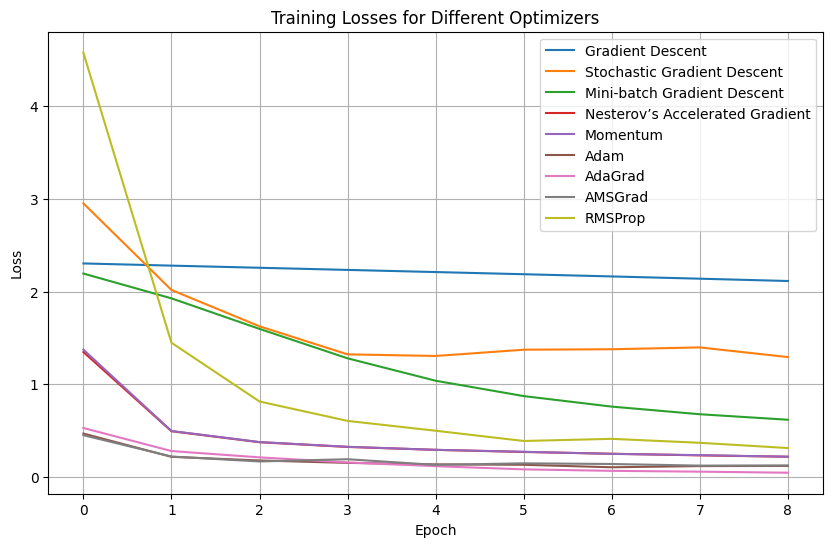

In [2]:
plt.figure(figsize=(10, 6))
for name in optimizers:
    plt.plot(losses[name], label=name)
plt.title('Training Losses for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


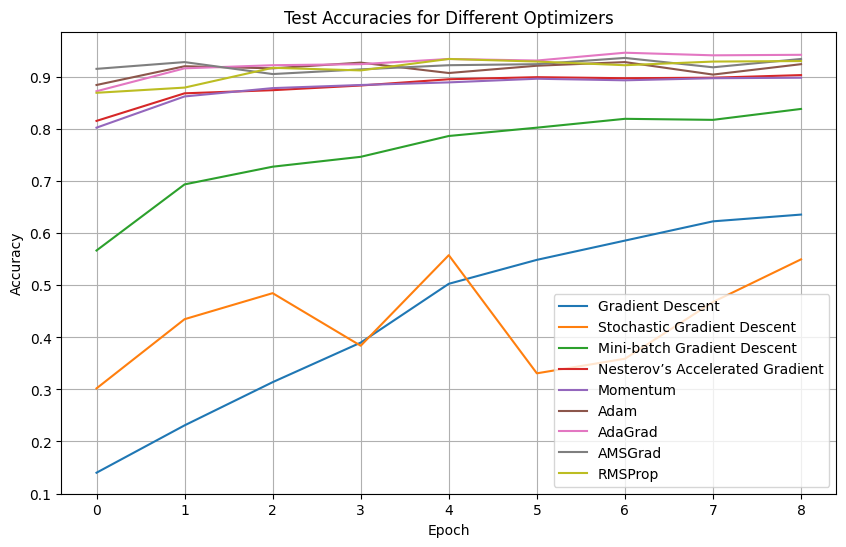

In [3]:
plt.figure(figsize=(10, 6))
for name in optimizers:
    plt.plot(accuracies[name], label=name)
plt.title('Test Accuracies for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
